In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
folder_path = './results'

In [18]:
dataframes = {}

for filename in os.listdir(folder_path):
    if filename.endswith('csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes[filename] = df
        print(f'Loaded: {filename}')

Loaded: 2025-11-26.csv
Loaded: 2025-11-21.csv
Loaded: 2025-11-23.csv
Loaded: 2025-11-27.csv
Loaded: 2025-11-20.csv
Loaded: 2025-11-25.csv
Loaded: 2025-11-22.csv
Loaded: 2025-11-29.csv
Loaded: 2025-11-28.csv
Loaded: 2025-11-24.csv


In [19]:
for key ,val in zip(dataframes.keys(), dataframes.values()):
    val = val.reset_index().rename(columns={'index':'rank'})
    dataframes[key] = val

In [20]:
df_total = pd.concat(dataframes.values(), ignore_index=False)  

In [21]:
df_total.head()

,rank,evaluation_date,uid,miner_hotkey,score,average_score,tested_entries,run_time_s,fbeta,weighted_f1,precision,recall,accuracy,model_url,errors
0,0,2025-11-26 15:46,122,5DRziDa6PGPMw5FkVh77WfevQdgzbbQ3NREpmNPVeQoETqaU,0.656272,0.670087,50.0,2.815585,0.837395,0.396160,0.843889,0.84,0.84,https://huggingface.co/speechmaster/76_123/blo...,NaN
1,1,2025-11-26 15:46,18,5CAZfA1Pz31zLAGngEHqz8rCcBiBUr8g6tmcT1SBa1pjNYxo,0.664216,0.665159,50.0,2.991870,0.844612,0.413813,0.891619,0.84,0.84,https://huggingface.co/speechmaster/76_118/blo...,NaN
2,2,2025-11-26 15:46,62,5GCH3w8m2H9ZC2fVAAPcEJQFz9xSzMJ1FCqXfYCLB6go6tD6,0.622000,0.653094,50.0,2.945914,0.818933,0.340000,0.822793,0.82,0.82,https://huggingface.co/speechmaster/76_94/blob...,NaN
3,3,2025-11-26 15:46,61,5FCTQMReiJVM132ouUXoRLeJ8FCLaf5HajSiYozEMZovRg2W,0.653360,0.645212,50.0,2.958398,0.827311,0.369689,0.809667,0.86,0.86,https://huggingface.co/grose99111/nmodel08/blo...,NaN
4,4,2025-11-26 15:46,231,5HnLHyELabFpTjmnmqeHgxQe7JLSJmf9qspwGiVxUMfptbEC,0.625394,0.643369,50.0,3.010791,0.815723,0.327543,0.797692,0.84,0.84,https://huggingface.co/speechmaster/76_138/blo...,NaN


In [22]:
df = df_total[[
    'rank', 
    'evaluation_date',
    'uid',
    'score',
    'average_score',
    # 'fbeta',
    # 'weighted_f1',
    'model_url'
]]

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_miner_performance_with_uid(uid):
    # Ensure evaluation_date is datetime
    df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])
    
    # Prepare lists
    dates = sorted(df['evaluation_date'].unique())
    scores = []
    avg_scores = []
    max_scores = []
    min_scores = []

    for dt in dates:
        # Filter by date
        df_date = df[df['evaluation_date'] == dt]
        
        # Stats for all miners on this date
        desc = df_date['average_score'].describe()
        avg_scores.append(desc['mean'])
        max_scores.append(desc['max'])
        min_scores.append(desc['min'])
        
        # Score for this UID on this date
        df_uid_date = df_date[df_date['uid'] == uid]
        if not df_uid_date.empty:
            scores.append(df_uid_date['average_score'].values[0])
        else:
            scores.append(None)  # if no score for this UID on this date

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(dates, scores, marker='o', linestyle='-', label=f"UID {uid} Score")
    plt.plot(dates, avg_scores, marker="o", linestyle='--', label="Average Score")
    plt.plot(dates, max_scores, marker="^", linestyle=':', label="Max Score")
    plt.plot(dates, min_scores, marker="v", linestyle='-.', label="Min Score")

    plt.title(f"Miner Performance for UID {uid}")
    plt.xlabel("Evaluation Date")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [24]:
df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])

newest_dates = df['evaluation_date'].sort_values(ascending=False).unique()[:5]
df_recent = df[df['evaluation_date'].isin(newest_dates)]
df_top = df_recent[df_recent['rank'].between(1, 10)]
uid_counts = df_top['uid'].value_counts()

frequent_miners = uid_counts[uid_counts >= 1].index.tolist()

print("Miners in top 1–10 at least 2 times in newest 6 days:", frequent_miners)

Miners in top 1–10 at least 2 times in newest 6 days: [18, 62, 61, 231, 123, 198, 15, 40, 4, 75, 204, 201, 255, 220, 95, 108, 22, 122, 187, 103, 45, 170, 47, 32, 83, 213]


/tmp/ipykernel_1240920/274948154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


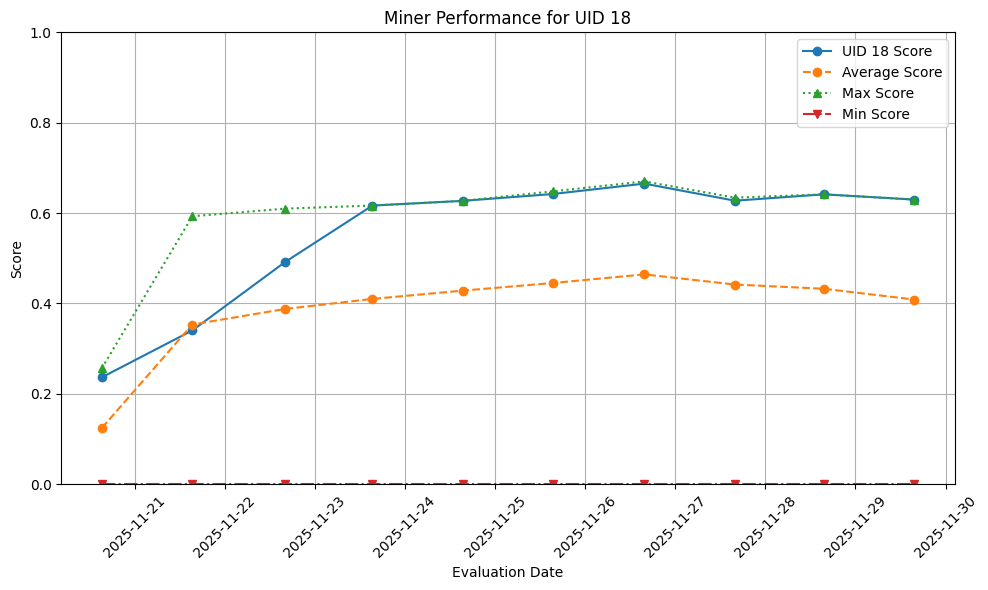

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


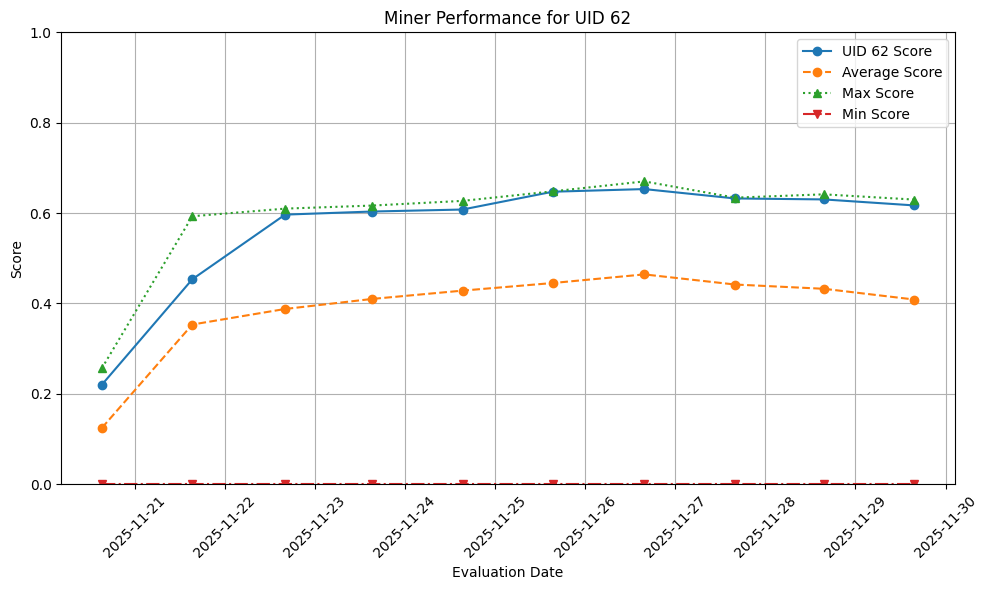

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


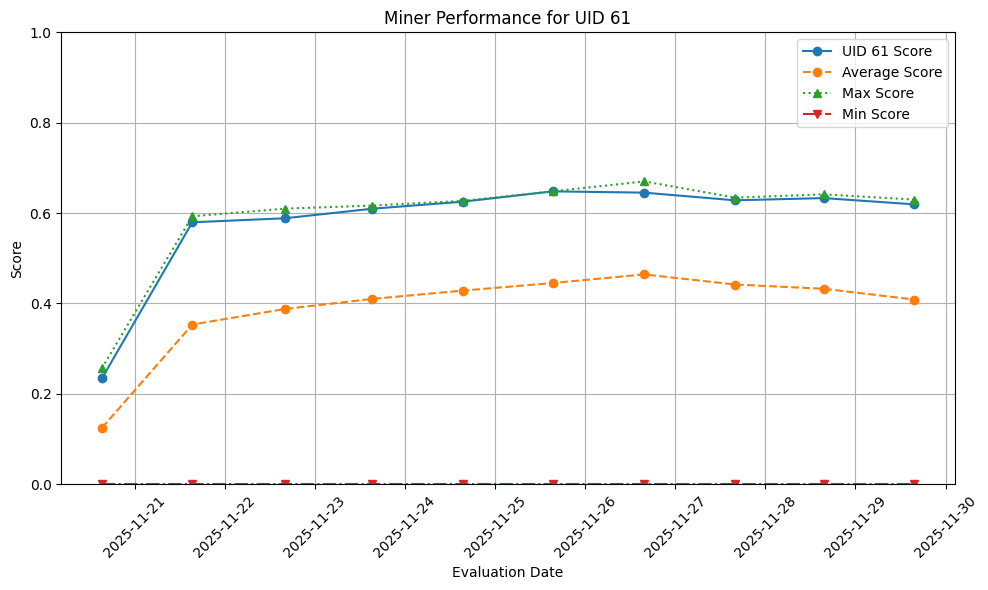

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


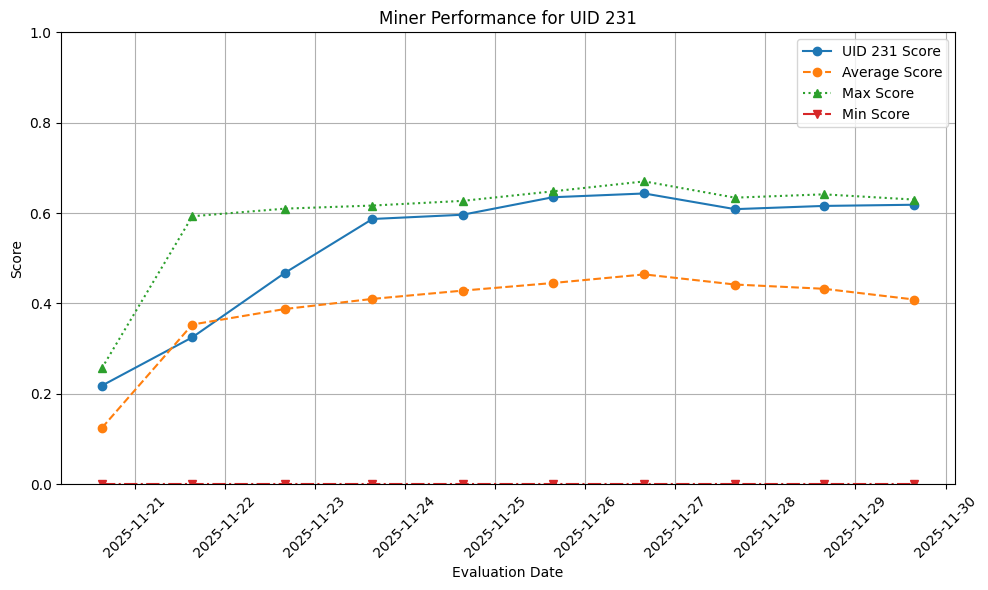

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


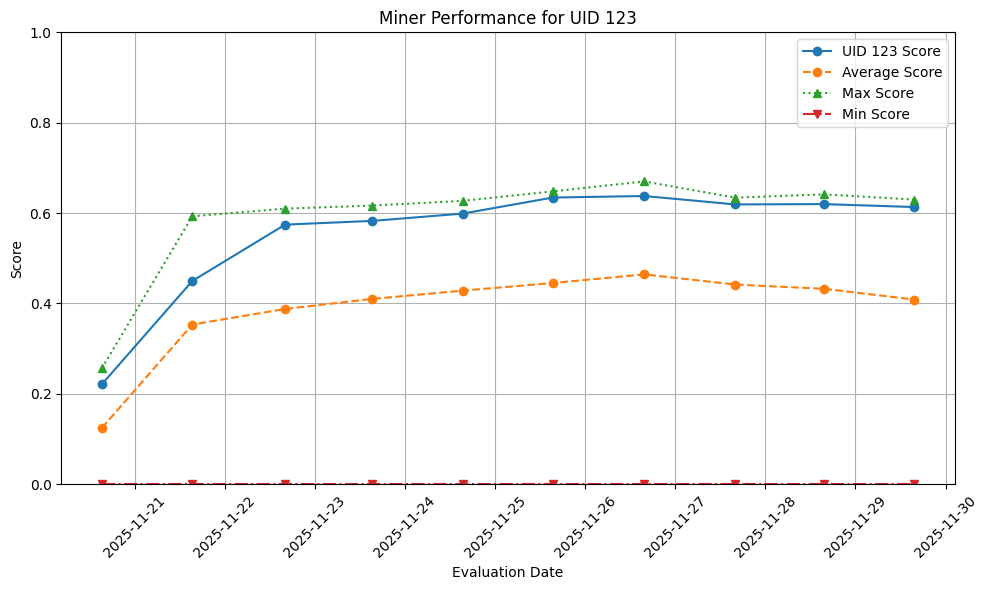

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


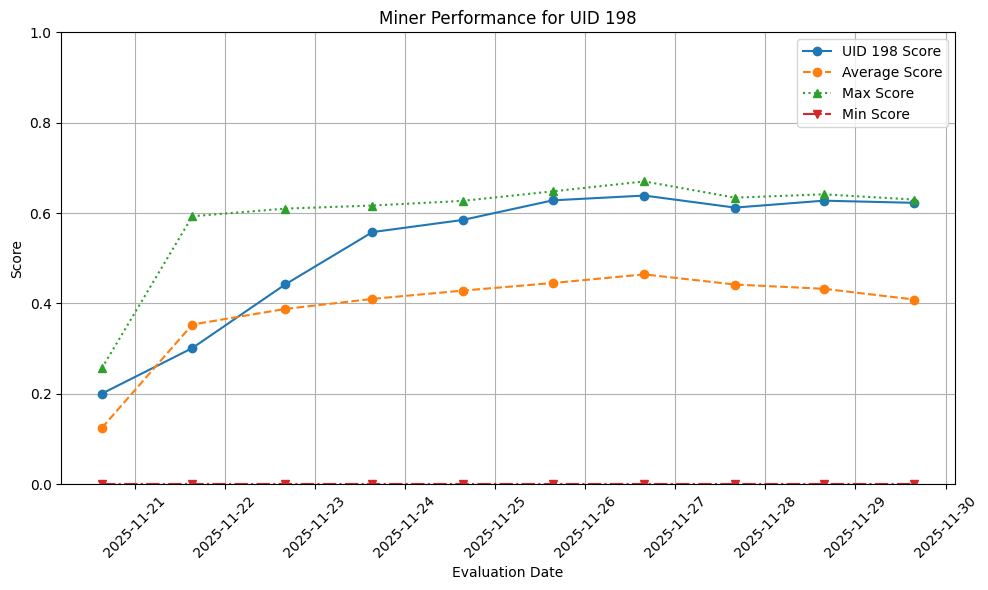

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


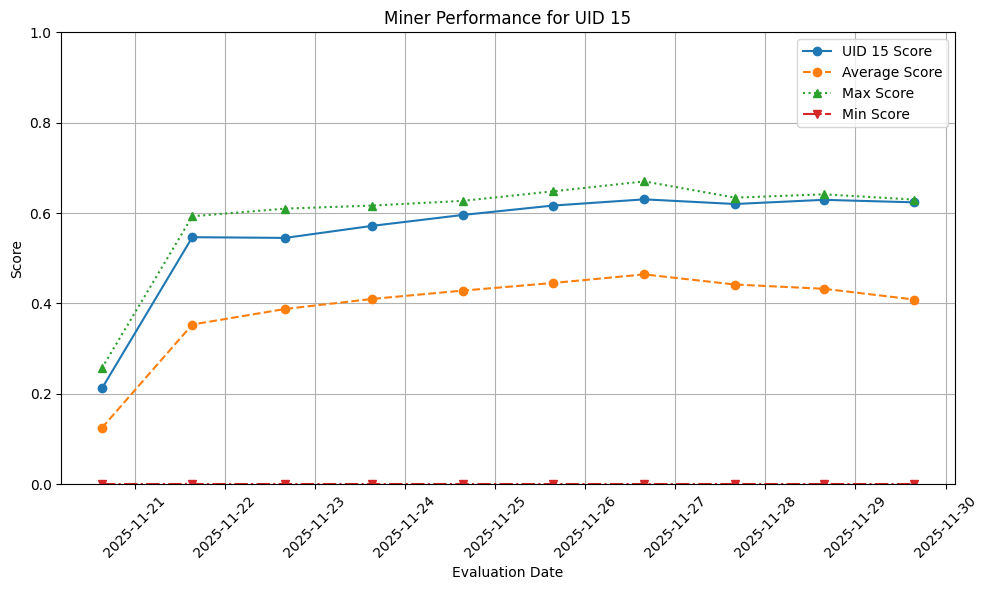

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


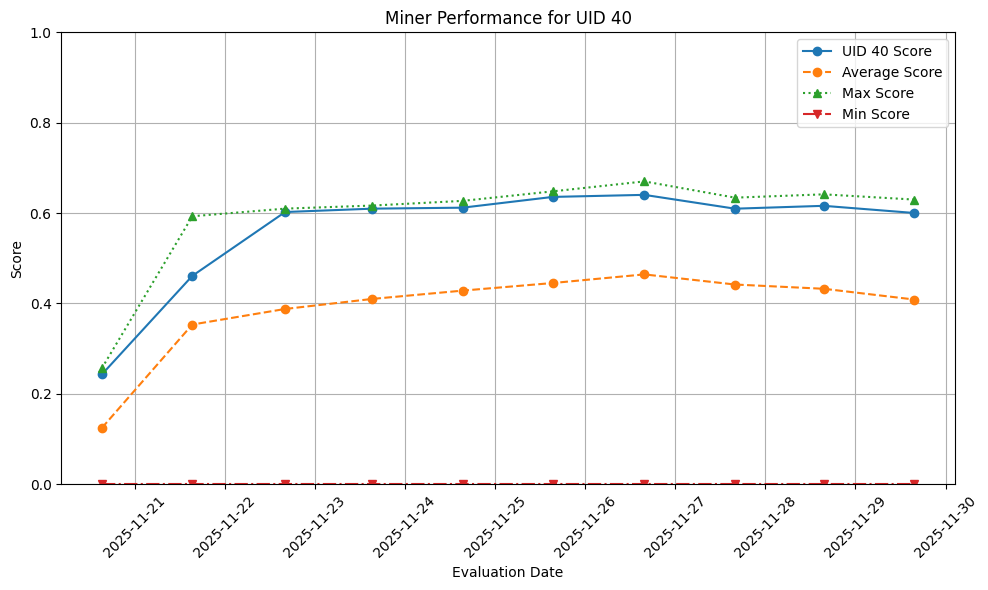

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


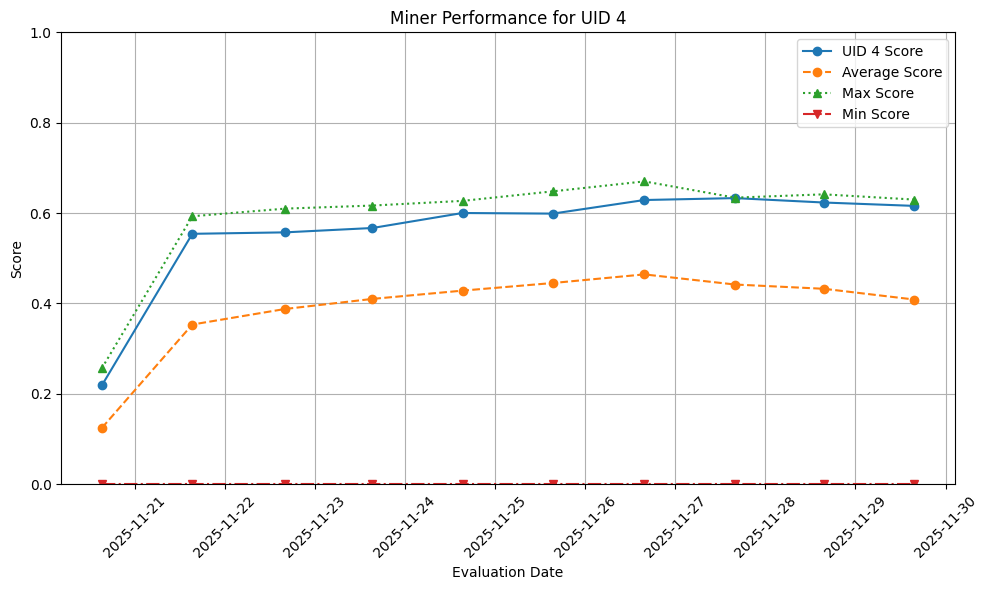

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


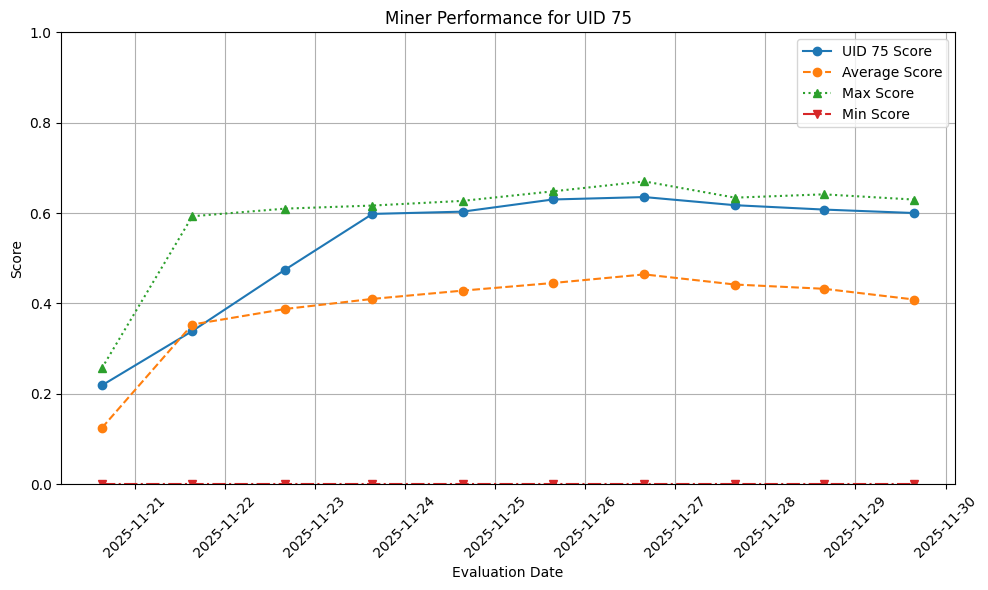

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


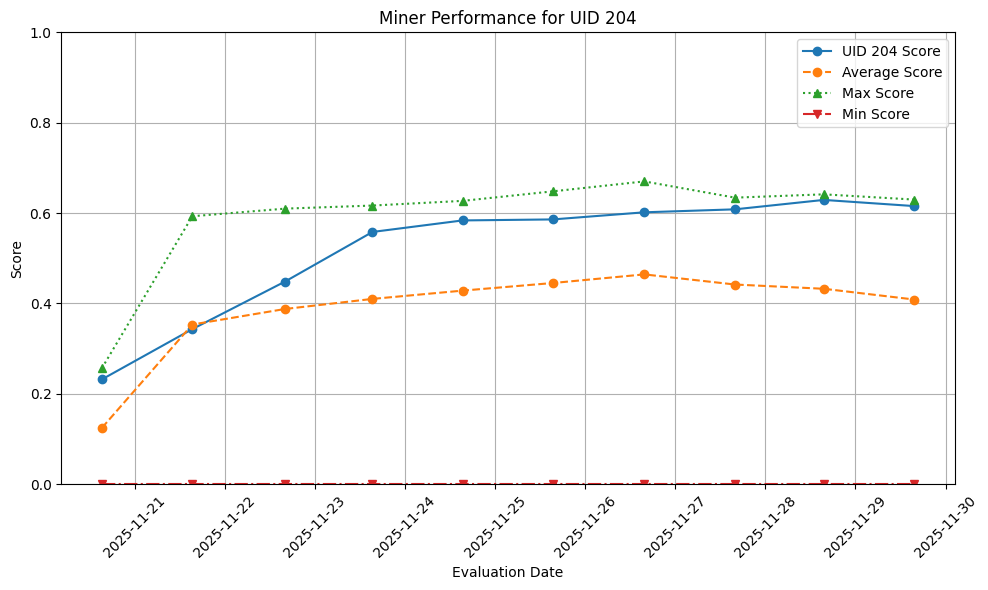

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


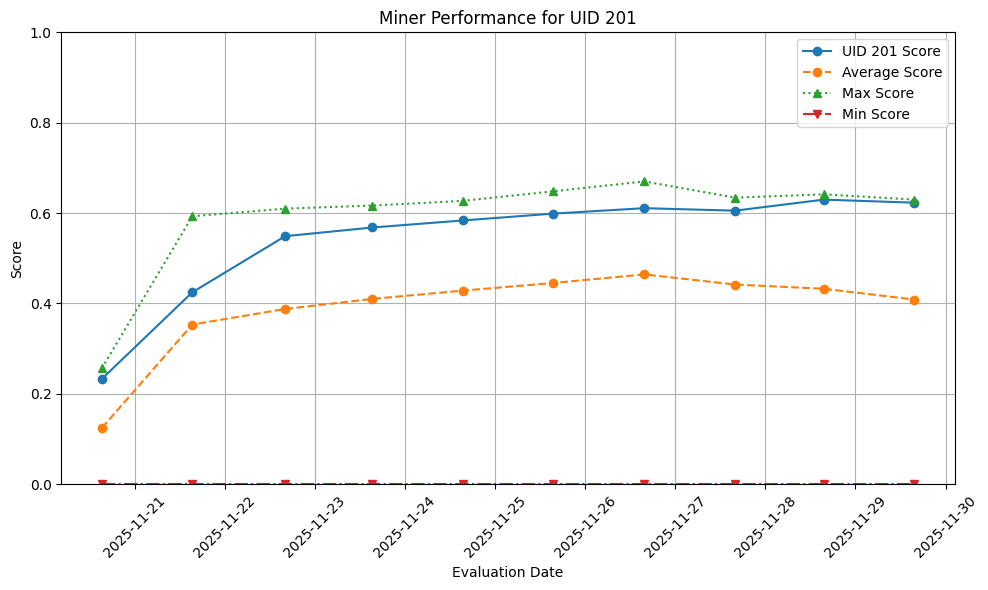

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


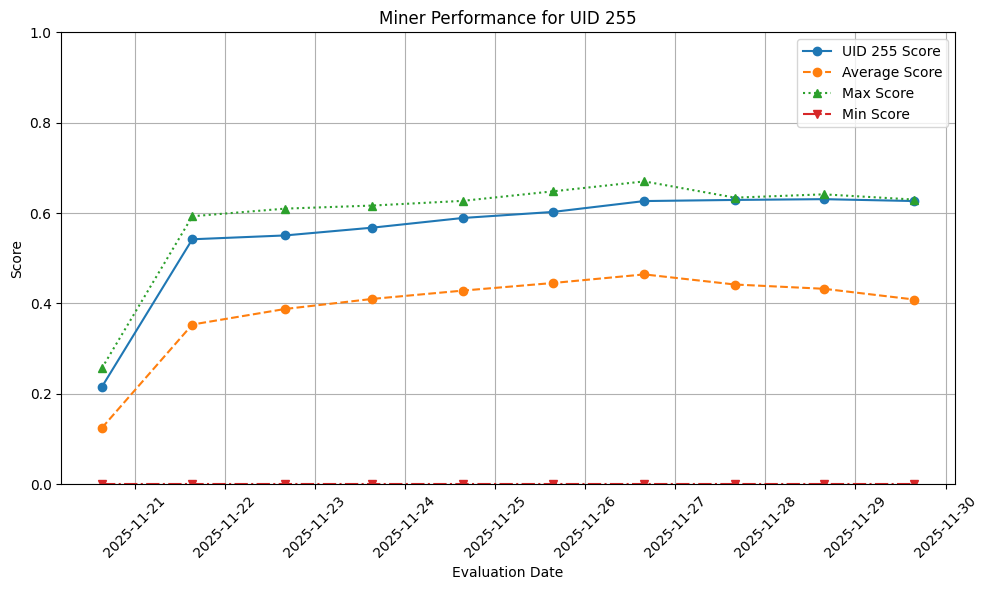

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


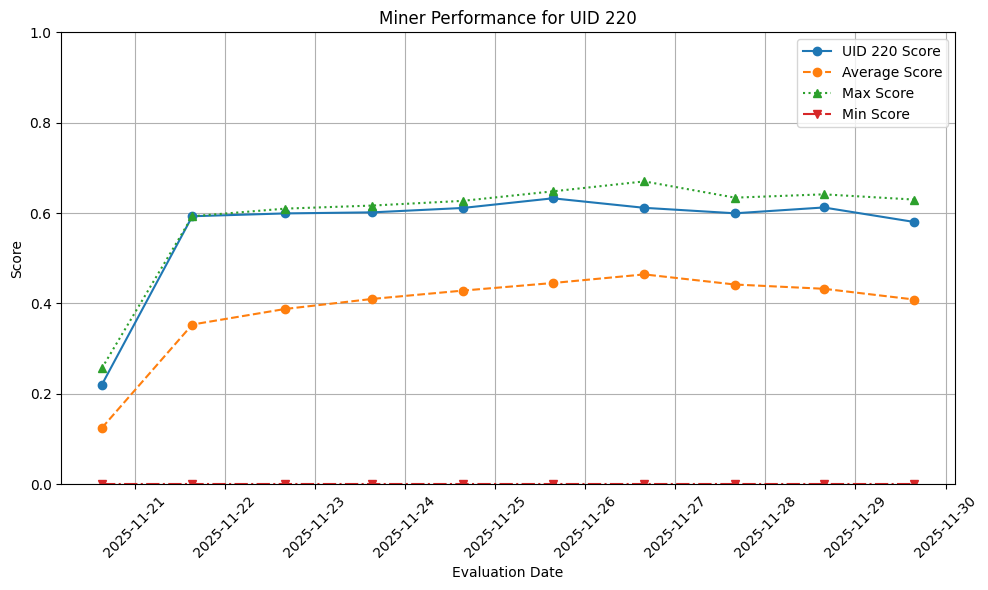

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


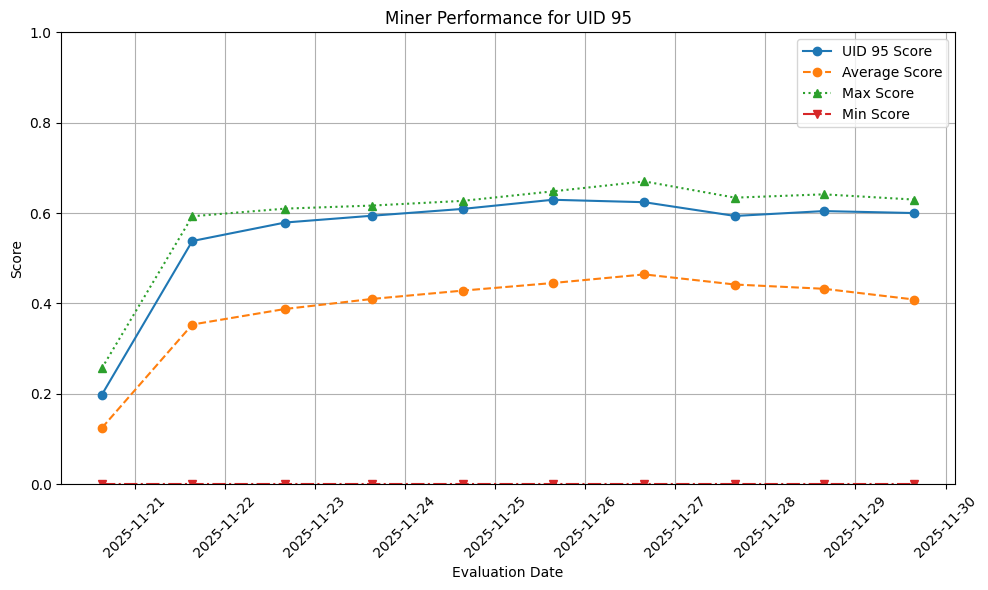

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


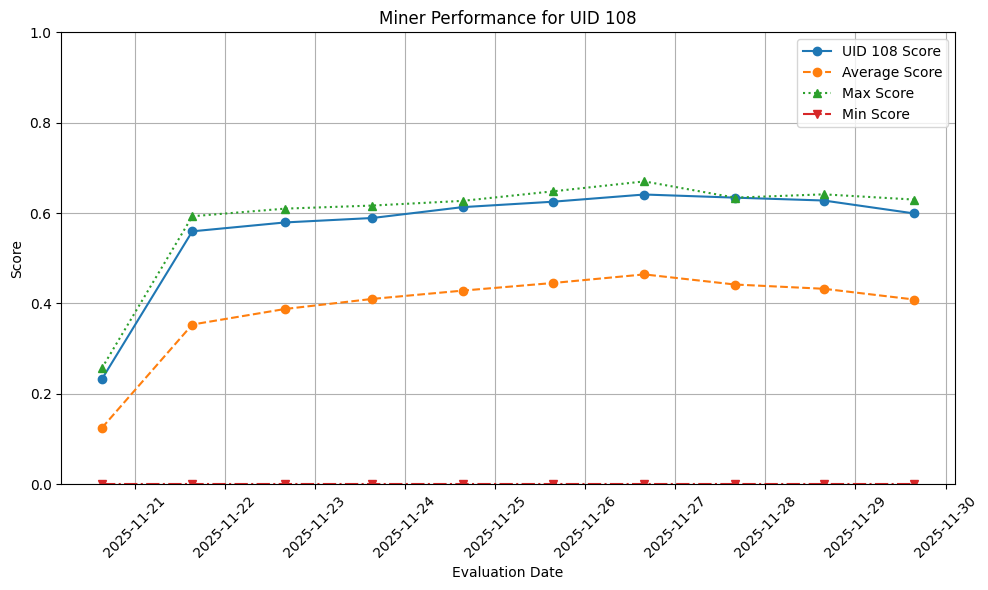

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


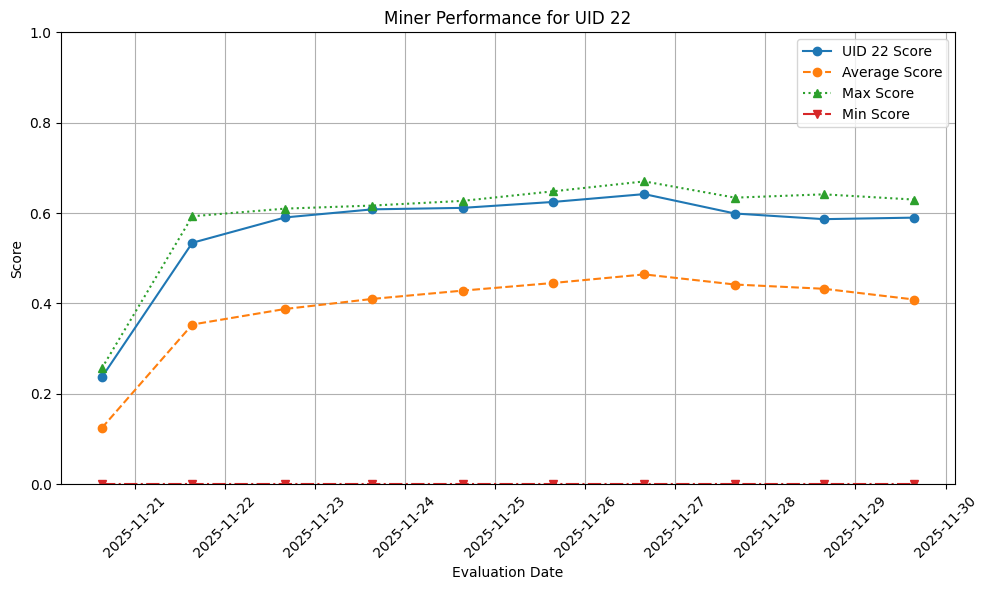

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


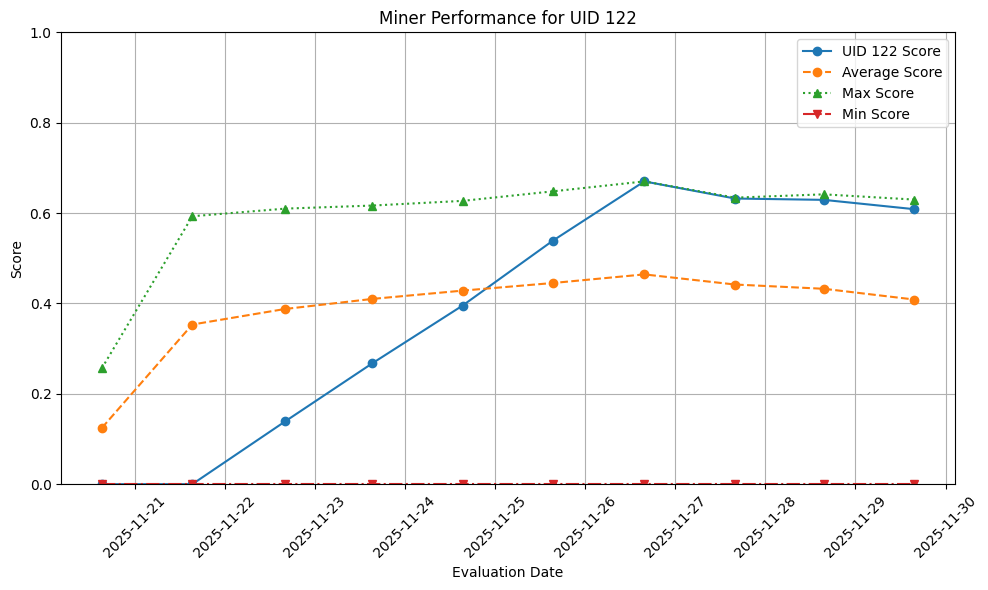

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


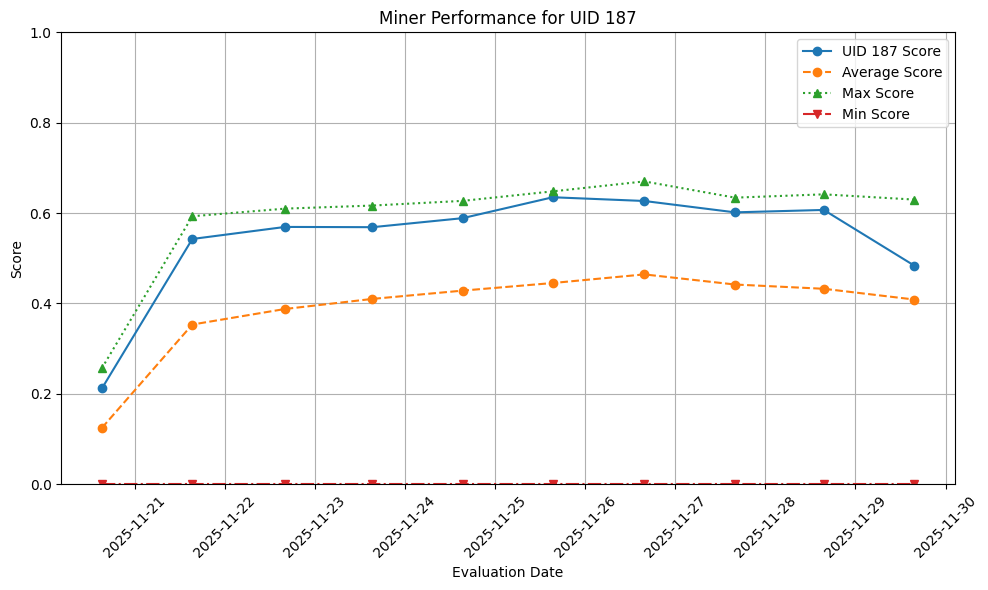

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


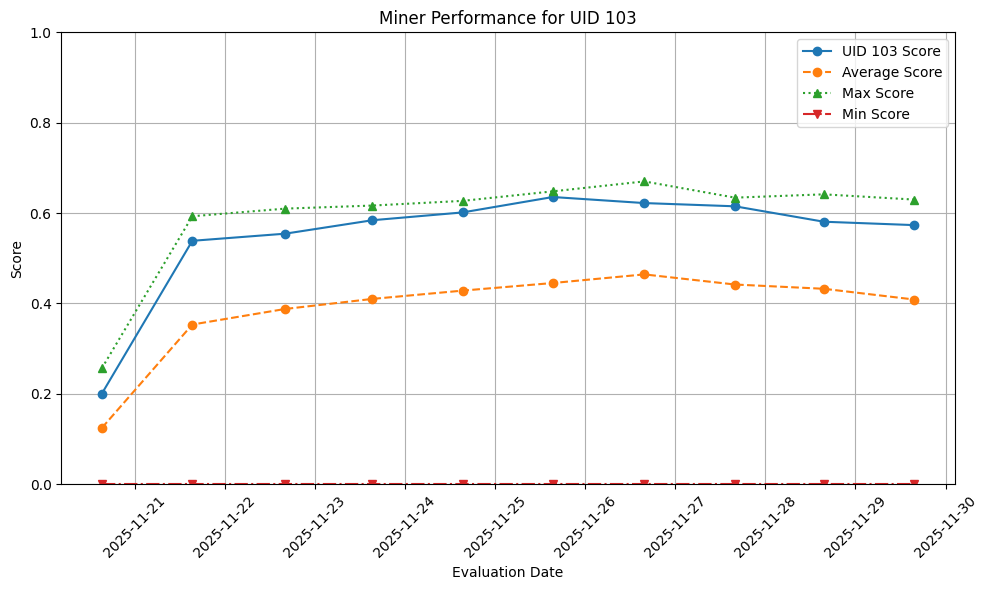

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


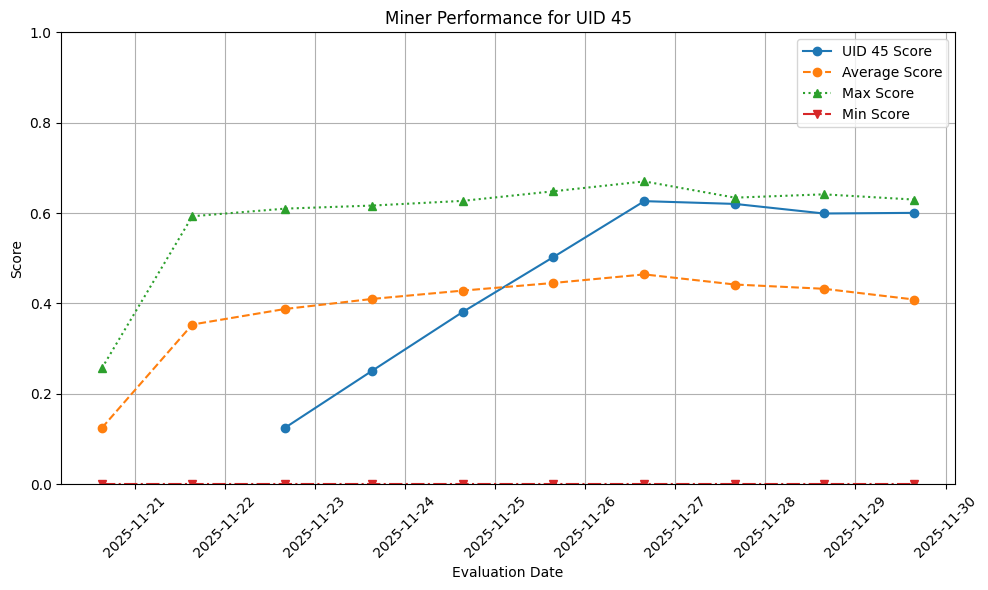

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


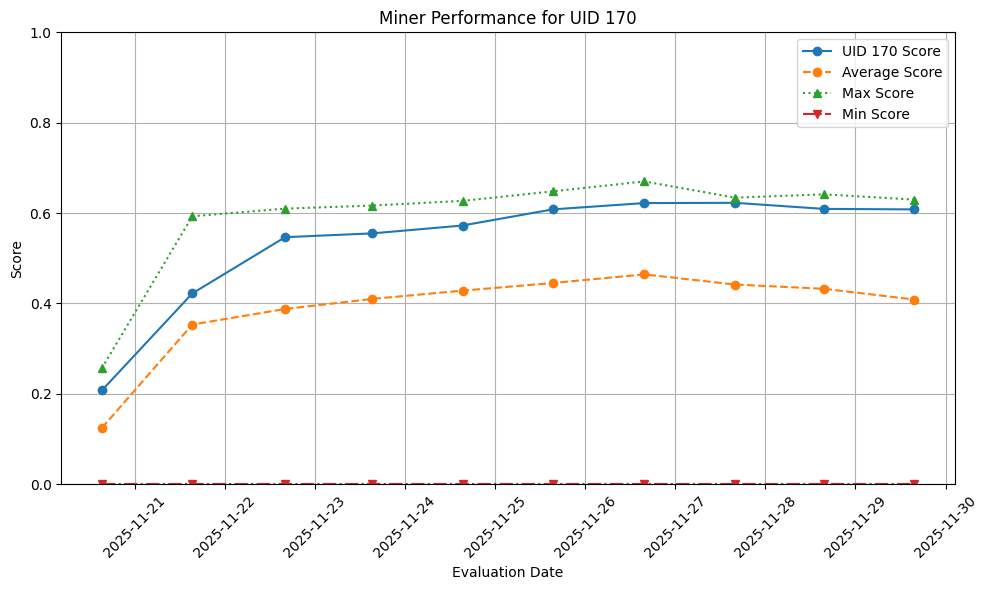

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


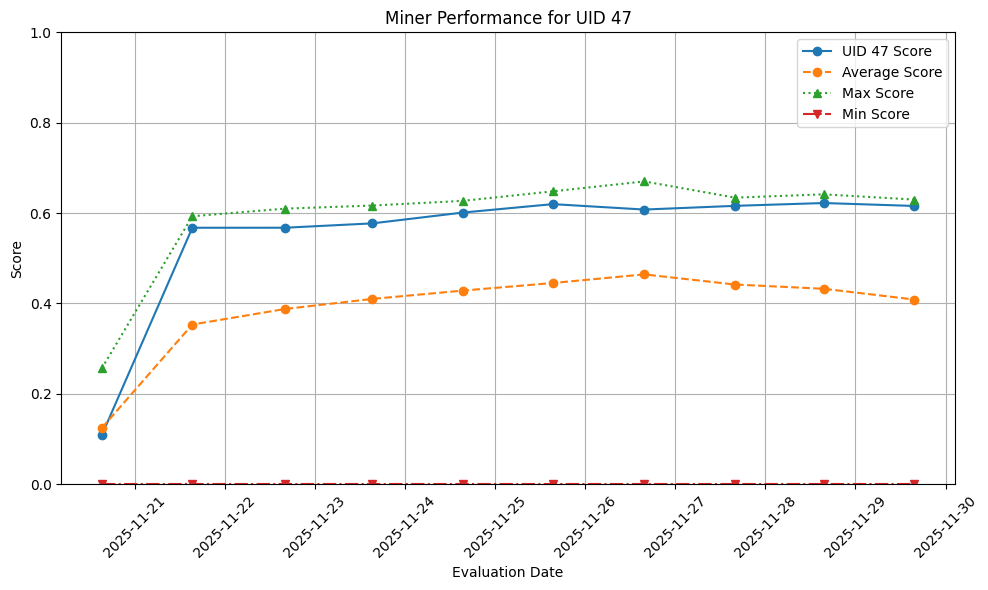

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


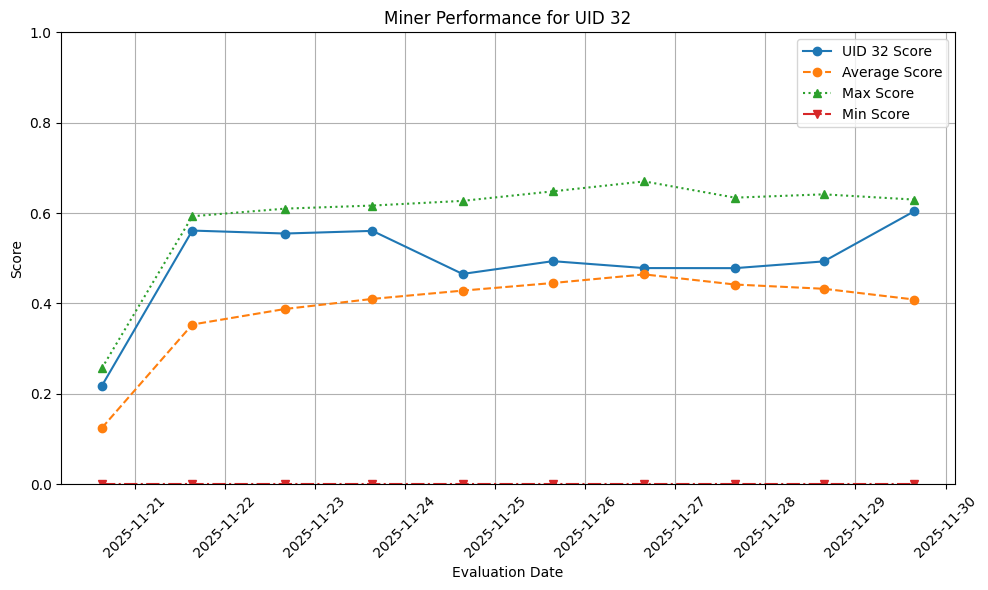

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


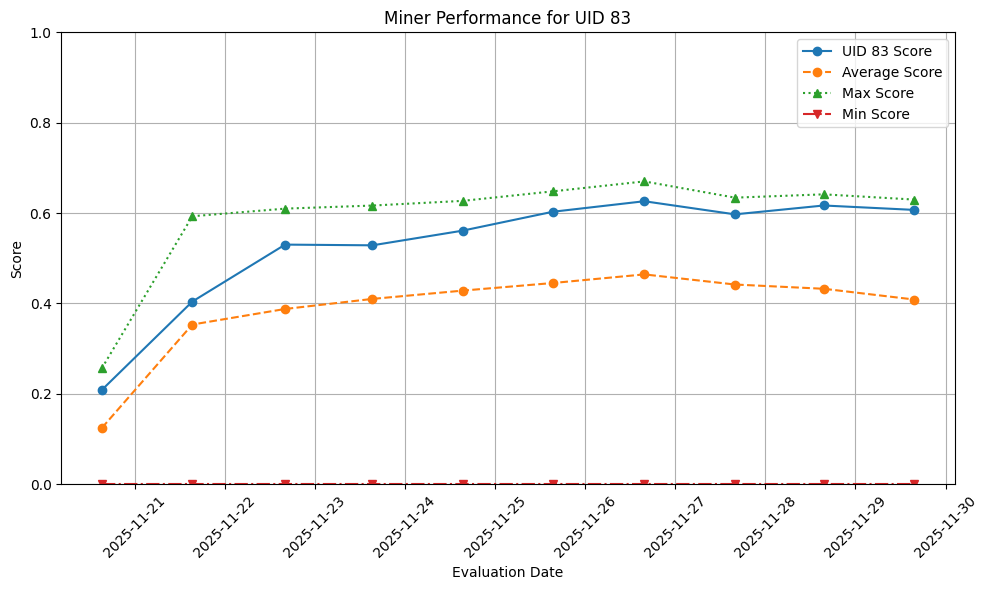

/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


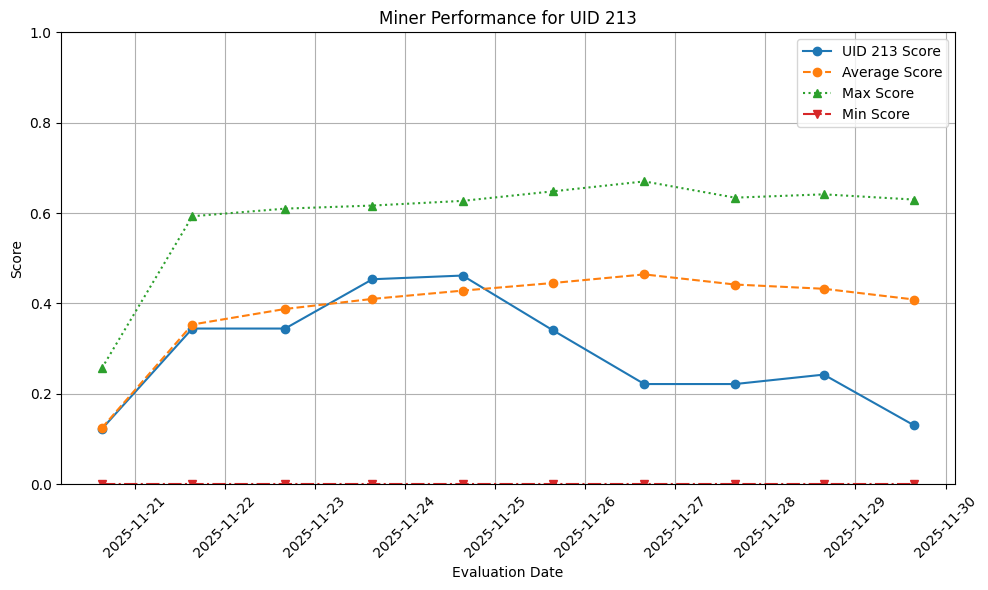

In [25]:
for id in frequent_miners:
    plot_miner_performance_with_uid(id)

In [26]:
for uid in [135]:
    tmp = df[df['uid'] == uid].sort_values('evaluation_date', ascending=False)
    display(tmp)
    

,rank,evaluation_date,uid,score,average_score,model_url
94,94,2025-11-29 15:38:00,135,0.492654,0.491368,https://huggingface.co/speechmaster/76_126/blo...
0,0,2025-11-28 15:34:00,135,0.709765,0.496006,https://huggingface.co/speechmaster/76_126/blo...
41,41,2025-11-27 15:55:00,135,0.596058,0.590427,https://huggingface.co/speechmaster/76_126/blo...
54,54,2025-11-26 15:46:00,135,0.619263,0.598565,https://huggingface.co/speechmaster/76_126/blo...
80,80,2025-11-25 15:24:00,135,0.658365,0.559582,https://huggingface.co/speechmaster/76_126/blo...
83,83,2025-11-24 15:21:00,135,0.515842,0.537022,https://huggingface.co/speechmaster/76_126/blo...
125,125,2025-11-23 15:22:00,135,0.562605,0.433853,https://huggingface.co/speechmaster/76_126/blo...
131,131,2025-11-22 16:06:00,135,0.636749,0.321332,https://huggingface.co/speechmaster/76_126/blo...
147,147,2025-11-21 15:23:00,135,0.424348,0.193982,https://huggingface.co/speechmaster/76_126/blo...
105,105,2025-11-20 15:18:00,135,0.559116,0.192133,https://huggingface.co/speechmaster/76_126/blo...


/tmp/ipykernel_1240920/3393296482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['evaluation_date'] = pd.to_datetime(df['evaluation_date'])


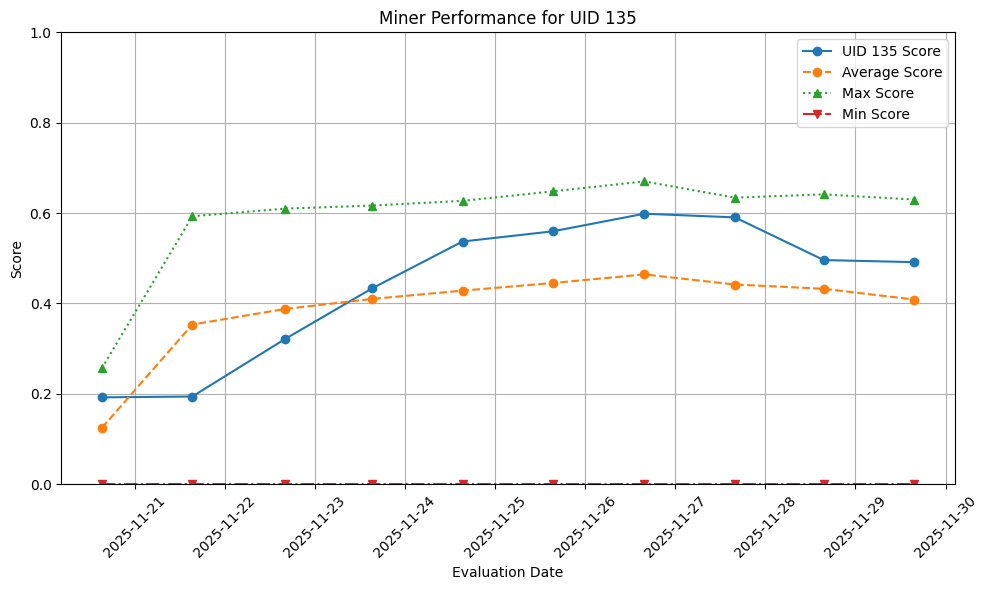

In [27]:
plot_miner_performance_with_uid(135)